# SA-MIRI LAB8+LAB9

## Part 1: Transfer Learning examples

Transfer Learning is a great technique to use if we’re running an experiment where we don’t have a large enough dataset. There exists quite a few models that can be leveraged, most which have been trained on the ImageNet dataset which has over 1.4 million images. This pre-trained network captures a lot of spacial hierarchies and as we can see from above, and does a great job when we input a dataset that it hasn’t been trained on. 

Note: Since the models are computationally expensive, let's only train for 5 epochs.

### Import TensorFlow

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
from tensorflow.keras.datasets.cifar10 import load_data

TensorFlow 2.x selected.


In [2]:
!nvidia-smi

Wed Dec 11 19:28:40 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.36       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## CIFAR workload

170500096/170498071 [==============================] - 4s 0us/step


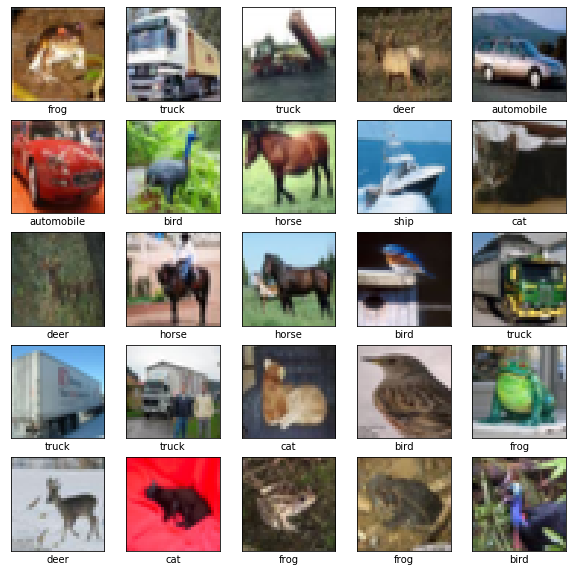

In [3]:
(train_images, train_labels), (test_images, test_labels) = load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [18]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

As you can see, our (3, 3, 64) outputs were flattened into vectors of shape (576) before going through two Dense layers.

## Compile and train the model

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 7s 130us/sample - loss: 1.5109 - accuracy: 0.4500 - val_loss: 1.2051 - val_accuracy: 0.5614
Epoch 2/5
50000/50000 [==============================] - 6s 119us/sample - loss: 1.1076 - accuracy: 0.6079 - val_loss: 1.0060 - val_accuracy: 0.6416
Epoch 3/5
50000/50000 [==============================] - 6s 119us/sample - loss: 0.9476 - accuracy: 0.6693 - val_loss: 0.9365 - val_accuracy: 0.6726
Epoch 4/5
50000/50000 [==============================] - 6s 121us/sample - loss: 0.8584 - accuracy: 0.6998 - val_loss: 0.9566 - val_accuracy: 0.6622
Epoch 5/5
50000/50000 [==============================] - 6s 118us/sample - loss: 0.7874 - accuracy: 0.7238 - val_loss: 0.8548 - val_accuracy: 0.7053


Evaluate the model

10000/1 - 1s - loss: 0.9303 - accuracy: 0.7053
0.7053


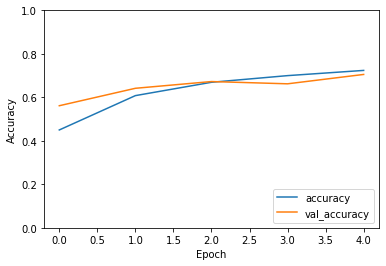

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)




## RESNET50 without pretraining

Here's the complete architecture of our model Resnet50

In [0]:
modelresnet50v2 = tf.keras.applications.ResNet50V2(include_top=True, weights=None,
            input_shape=(32, 32, 3), classes=10)




In [24]:
modelresnet50v2.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [25]:

opt = tf.keras.optimizers.SGD(0.002)

modelresnet50v2.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = modelresnet50v2.fit(train_images, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 58s 1ms/sample - loss: 2.0457 - accuracy: 0.2624 - val_loss: 1.8137 - val_accuracy: 0.3444
Epoch 2/5
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.6954 - accuracy: 0.3872 - val_loss: 1.5595 - val_accuracy: 0.4404
Epoch 3/5
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.5410 - accuracy: 0.4436 - val_loss: 1.5148 - val_accuracy: 0.4530
Epoch 4/5
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.4212 - accuracy: 0.4882 - val_loss: 1.4170 - val_accuracy: 0.4881
Epoch 5/5
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.3272 - accuracy: 0.5231 - val_loss: 1.3869 - val_accuracy: 0.5041


10000/1 - 3s - loss: 1.3328 - accuracy: 0.5041
0.5041


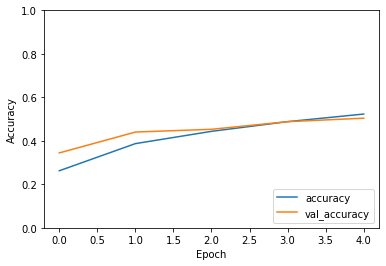

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelresnet50v2.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

### RESNET50 with pretrained weight from imagenet


Next, let's load ResNet50 with just the convolutional layers and not the dense layers so we can train our new dataset on the new dense layers that we create


In [0]:
modelresnet50v2pre = tf.keras.Sequential()

modelresnet50v2pre.add(tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet',
            pooling='avg', input_shape=(32, 32, 3)))




In [28]:
modelresnet50v2pre.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 2048)              23564800  
Total params: 23,564,800
Trainable params: 23,519,360
Non-trainable params: 45,440
_________________________________________________________________


In [0]:
modelresnet50v2pre.add(layers.Dense(10, activation="softmax"))

In [30]:
modelresnet50v2pre.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 2048)              23564800  
_________________________________________________________________
dense_11 (Dense)             (None, 10)                20490     
Total params: 23,585,290
Trainable params: 23,539,850
Non-trainable params: 45,440
_________________________________________________________________


In [31]:
opt = tf.keras.optimizers.SGD(0.002)

modelresnet50v2pre.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = modelresnet50v2pre.fit(train_images, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.7876 - accuracy: 0.3730 - val_loss: 1.4611 - val_accuracy: 0.5339
Epoch 2/5
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.2559 - accuracy: 0.5695 - val_loss: 1.0755 - val_accuracy: 0.6292
Epoch 3/5
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.0627 - accuracy: 0.6397 - val_loss: 1.1193 - val_accuracy: 0.6659
Epoch 4/5
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.9337 - accuracy: 0.6862 - val_loss: 0.8727 - val_accuracy: 0.7078
Epoch 5/5
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.8440 - accuracy: 0.7139 - val_loss: 0.8518 - val_accuracy: 0.7099


10000/1 - 4s - loss: 0.8775 - accuracy: 0.7099
0.7099


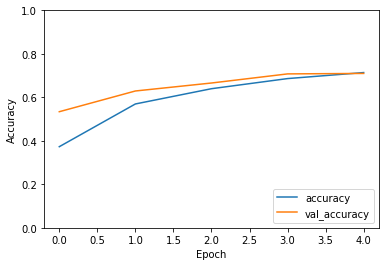

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelresnet50v2pre.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)


### RESNET101

In [33]:
model = tf.keras.Sequential()

model.add(tf.keras.applications.ResNet101V2(include_top=False, weights='imagenet',
            pooling='avg', input_shape=(32, 32, 3)))
model.add(layers.Dense(10, activation="softmax"))

opt = tf.keras.optimizers.SGD(0.002)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

171319296/171317808 [==============================] - 2s 0us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 108s 2ms/sample - loss: 1.7943 - accuracy: 0.3722 - val_loss: 1.4031 - val_accuracy: 0.5295
Epoch 2/5
50000/50000 [==============================] - 96s 2ms/sample - loss: 1.2809 - accuracy: 0.5646 - val_loss: 1.1925 - val_accuracy: 0.6151
Epoch 3/5
50000/50000 [==============================] - 96s 2ms/sample - loss: 1.0771 - accuracy: 0.6364 - val_loss: 1.0652 - val_accuracy: 0.6556
Epoch 4/5
50000/50000 [==============================] - 95s 2ms/sample - loss: 0.9366 - accuracy: 0.6838 - val_loss: 0.9308 - val_accuracy: 0.6949
Epoch 5/5
50000/50000 [==============================] - 95s 2ms/sample - loss: 0.8448 - accuracy: 0.7136 - val_loss: 0.8559 - val_accuracy: 0.7150


10000/1 - 6s - loss: 0.8260 - accuracy: 0.7150
0.715


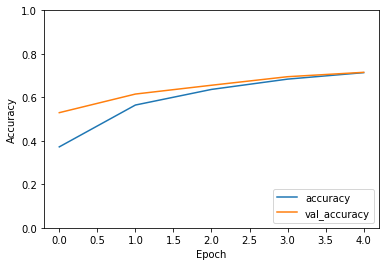

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

### VGG19

In [35]:
model = tf.keras.Sequential()

model.add(tf.keras.applications.VGG19(include_top=False, weights='imagenet',
            pooling='avg', input_shape=(32, 32, 3)))
model.add(layers.Dense(10, activation="softmax"))

opt = tf.keras.optimizers.SGD(0.002)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

80142336/80134624 [==============================] - 1s 0us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 37s 749us/sample - loss: 1.0218 - accuracy: 0.6411 - val_loss: 0.7649 - val_accuracy: 0.7374
Epoch 2/5
50000/50000 [==============================] - 36s 723us/sample - loss: 0.6641 - accuracy: 0.7688 - val_loss: 0.6663 - val_accuracy: 0.7700
Epoch 3/5
50000/50000 [==============================] - 36s 726us/sample - loss: 0.5546 - accuracy: 0.8074 - val_loss: 0.5773 - val_accuracy: 0.7968
Epoch 4/5
50000/50000 [==============================] - 36s 723us/sample - loss: 0.4814 - accuracy: 0.8322 - val_loss: 0.6499 - val_accuracy: 0.7831
Epoch 5/5
50000/50000 [==============================] - 36s 722us/sample - loss: 0.4241 - accuracy: 0.8530 - val_loss: 0.5717 - val_accuracy: 0.8008


10000/1 - 3s - loss: 0.8077 - accuracy: 0.8008
0.8008


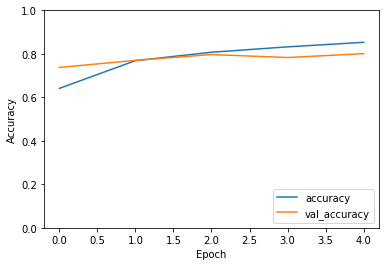

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

### MOBILENETV2


In [37]:
model = tf.keras.Sequential()

model.add(tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet',
            pooling='avg', input_shape=(32, 32, 3)))
model.add(layers.Dense(10, activation="softmax"))

opt = tf.keras.optimizers.SGD(0.002)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

/tensorflow-2.0.0/python3.6/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 33s 654us/sample - loss: 1.8193 - accuracy: 0.3779 - val_loss: 2.2950 - val_accuracy: 0.1597
Epoch 2/5
50000/50000 [==============================] - 28s 556us/sample - loss: 1.3026 - accuracy: 0.5454 - val_loss: 1.9595 - val_accuracy: 0.5066
Epoch 3/5
50000/50000 [==============================] - 28s 553us/sample - loss: 1.1110 - accuracy: 0.6126 - val_loss: 1.4359 - val_accuracy: 0.6030
Epoch 4/5
50000/50000 [==============================] - 28s 550us/sample - loss: 0.9859 - accuracy: 0.6576 - val_loss: 1.1035 - val_accuracy: 0.6477
Epoch 5/5
50000/50000 [==============================] - 28s 553us/sample - loss: 0.9061 - accuracy: 0.6856 - val_loss: 0.9589 - val_accuracy: 0.6882


10000/1 - 2s - loss: 1.0110 - accuracy: 0.6882
0.6882


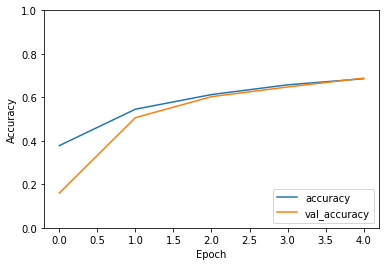

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

## A better model :-)

In [39]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


We decided to upscaled 3 times before we pass it through the ResNet layers. After the images go through ResNet, we flatten our processed input and pass it though 2 dense layers (with 128 and 64 neurons respectively). Each layer has batch normalization beforehand and dropout coming out before the last layer, with softmax and 10 neurons. 


In [4]:
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

model.add(tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_shape=(32, 32, 3)))

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.RMSprop(lr=2e-5)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=8, 
          validation_data=(test_images, test_labels))

94674944/94668760 [==============================] - 3s 0us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 369s 7ms/sample - loss: 1.5015 - accuracy: 0.5057 - val_loss: 0.5697 - val_accuracy: 0.8560
Epoch 2/8
50000/50000 [==============================] - 349s 7ms/sample - loss: 0.8469 - accuracy: 0.7626 - val_loss: 0.3451 - val_accuracy: 0.9153
Epoch 3/8
50000/50000 [==============================] - 349s 7ms/sample - loss: 0.6061 - accuracy: 0.8510 - val_loss: 0.2841 - val_accuracy: 0.9246
Epoch 4/8
50000/50000 [==============================] - 349s 7ms/sample - loss: 0.4649 - accuracy: 0.8972 - val_loss: 0.2090 - val_accuracy: 0.9467
Epoch 5/8
50000/50000 [==============================] - 349s 7ms/sample - loss: 0.3568 - accuracy: 0.9277 - val_loss: 0.2020 - val_accuracy: 0.9449
Epoch 6/8
50000/50000 [==============================] - 349s 7ms/sample - loss: 0.2848 - accuracy: 0.9467 - val_loss: 0.1838 - val_accuracy

10000/1 - 20s - loss: 0.2164 - accuracy: 0.9510
0.951


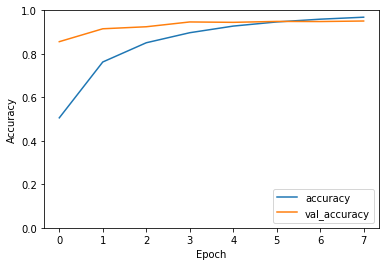

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)